In [3]:
import numpy as np
import numpy.ma as ma
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.patches as patches
from matplotlib.lines import Line2D
import datetime
import scipy

import VVSAnalyzer
import MBTAnalyzer
import vid2vib_utils
import spectra_utils
import aggregate_utils
import plotting_utils
import accelerometer_utils

In [9]:
vid2vib_pa_kwargs = {'reduction':'gray'}

freqmin = 0.15
freqmax = 0.5

spectra_func = spectra_utils.get_spectra_periodogram
spectra_func_kwargs = {'window':'hann', 'nfft':2048}

dom_freq_func = spectra_utils.get_dom_freq_peak_finder
dom_freq_func_kwargs = {}

percentile=30
masks = [{'name':f'Prominence, {percentile}th percentile',
          'weight':'prominence',
          'kwargs':{'stat_reduc':'percentile', 'percentile':percentile}}, 
        ]

figsize=(14,7)

In [10]:
# init settings
roi = 'control460_whole'
rois = {'w293_whole' : [420, 520, 395, 445],
        'control460_whole' : [350, 700, 650, 800],
        'trees_foreground' : [400, 1000, 750, 1000],
        'region1' : [336, 732, 200, 904],
        'region2' : [400, 700, 200, 500]}

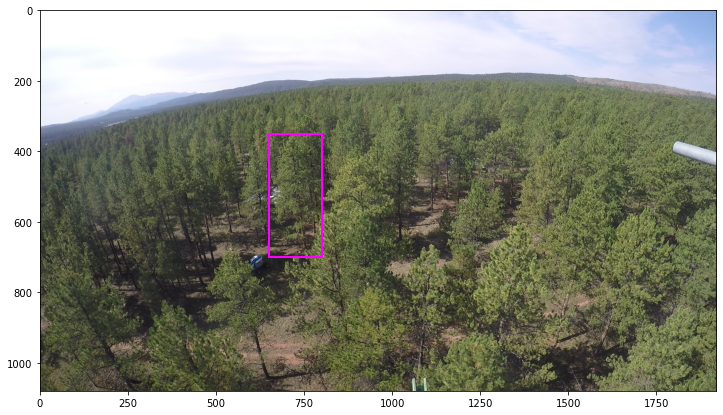

In [11]:
vid_path = vid_path = f'../TreeSwayData/sidneytrees/videos/SidneyTrees_30s_{6139}.MP4'
ax = plotting_utils.plot_frame(vid_path, no_ticks=False, figsize=figsize)
plotting_utils.plot_rois(ax, [rois[roi]])

In [12]:
def get_dom_freq(vid_num):
    vid_path = f'../TreeSwayData/sidneytrees/videos/SidneyTrees_30s_{vid_num}.MP4'
    out_prefix = f'./output/manitou_{vid_num}_{roi}'
    
    vvs = VVSAnalyzer.VVSAnalyzer(vid_path, rois[roi], out_prefix)
    vib_vvs, fps = vvs.vid2vib(vid2vib_pa_kwargs)
    freq_vvs, pxx_vvs = vvs.compute_spectra(freqmin, freqmax, spectra_func, spectra_func_kwargs) 
    agg_df_vvs, pxx_avg_vvs, pxx_avg_peak_idx_vvs, dom_freq, masked, masked_avg_spectrums, masked_avg_spectrums_peak_idxs = vvs.aggregate(dom_freq_func, dom_freq_func_kwargs, masks=masks)
    return freq_vvs, dom_freq, masked[0]

# Before

In [13]:
before_num = 6145
freqs, dom_freq_before, dom_freq_masked_before = get_dom_freq(before_num)

Reading video into array
904
Finished reading video into array
Computing pixel spectra
Finished computing spectra


Text(0.5, 1.0, 'Before\nVideo: 6145')

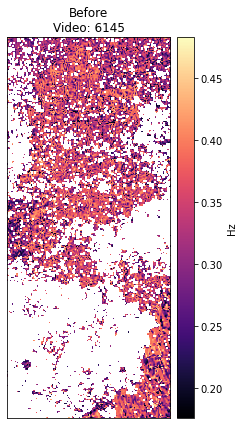

In [14]:
ax = plotting_utils.plot_image(dom_freq_masked_before, colorbarlabel='Hz', figsize=figsize)
ax.set_title(f'Before\nVideo: {before_num}')

# After

In [15]:
after_num = 6151
freqs, dom_freq_after, dom_freq_masked_after = get_dom_freq(after_num)

Reading video into array
902
Finished reading video into array
Computing pixel spectra
Finished computing spectra


Text(0.5, 1.0, 'After\nVideo: 6151')

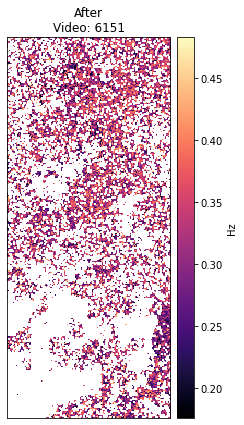

In [16]:
ax = plotting_utils.plot_image(dom_freq_masked_after, colorbarlabel='Hz', figsize=figsize)
ax.set_title(f'After\nVideo: {after_num}')

# Difference

Text(0.5, 1.0, 'After - Before')

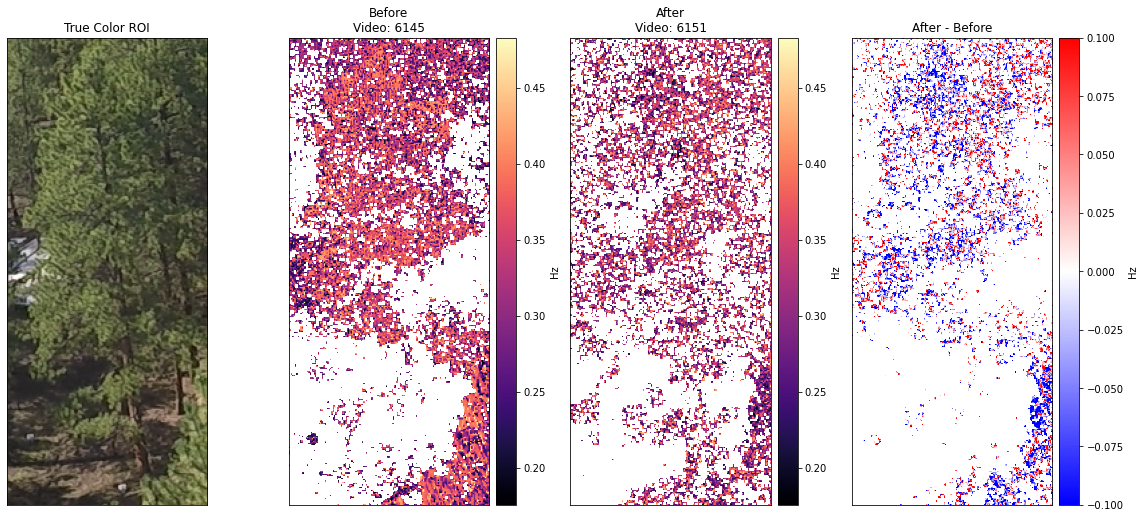

In [18]:
fig, ax = plt.subplots(1,4, figsize=(16,28), tight_layout=True)

frame = vid2vib_utils.get_frame(vid_path)
ymin, ymax, xmin, xmax = rois[roi]
roi_tc = frame[ymin:ymax, xmin:xmax, :]
plotting_utils.plot_truecolor_image(roi_tc, ax=ax[0], colorbar=True)
ax[0].set_title(f'True Color ROI')
ax[0].images[-1].colorbar.remove()

plotting_utils.plot_image(dom_freq_masked_before, colorbarlabel='Hz', figsize=figsize, ax=ax[1])
ax[1].set_title(f'Before\nVideo: {before_num}')

plotting_utils.plot_image(dom_freq_masked_after, colorbarlabel='Hz', figsize=figsize, ax=ax[2])
ax[2].set_title(f'After\nVideo: {after_num}')

plotting_utils.plot_image(dom_freq_masked_after - dom_freq_masked_before, colorbarlabel='Hz', cmap='bwr', figsize=figsize, ax=ax[3], low=-0.1, high=0.1)
ax[3].set_title(f'After - Before')


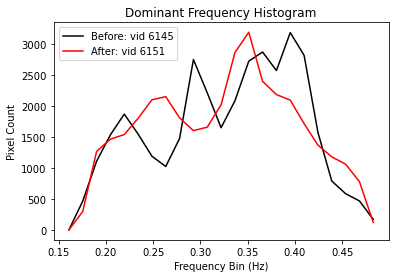

In [19]:
fig, ax = plt.subplots()

plotting_utils.plot_freq_histogram(dom_freq_masked_before.compressed(), freqs, ax=ax, color='k', label_peak=False, density=False, figsize=figsize)
plotting_utils.plot_freq_histogram(dom_freq_masked_after.compressed(), freqs, ax=ax, color='red', label_peak=False, density=False, figsize=figsize)
plt.legend([f'Before: vid {before_num}', f'After: vid {after_num}'])